In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls /content/drive/"My Drive/Bank"

bank-additional.csv  bank-additional-full.csv  bank.csv  bank-full.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('drive/My Drive/Bank/bank-additional-full.csv',sep=';')

In [0]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


#input variables:
##bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
##related with the last contact of the current campaign:<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br> 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
##social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br> 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

##Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [0]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [0]:
df.shape

(41188, 21)

## Check Unique values of all the column

In [0]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------------------------
housing
['no' 'yes' 'unknown']
------------------------------------------------------------


## List of numeric columns

In [0]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## List of Categorical columns

In [0]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

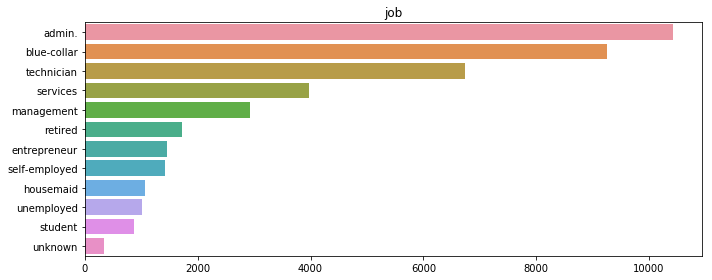

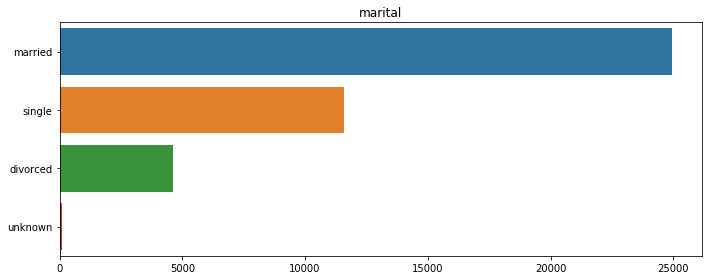

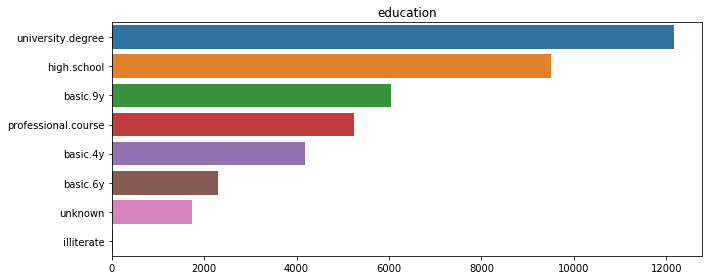

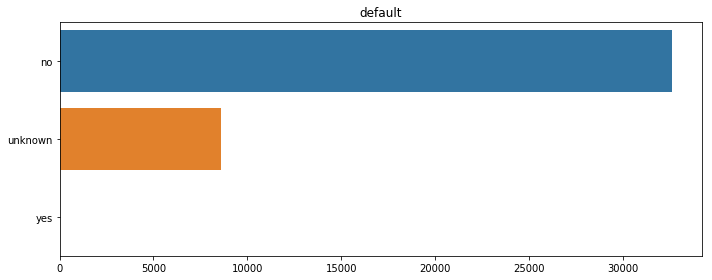

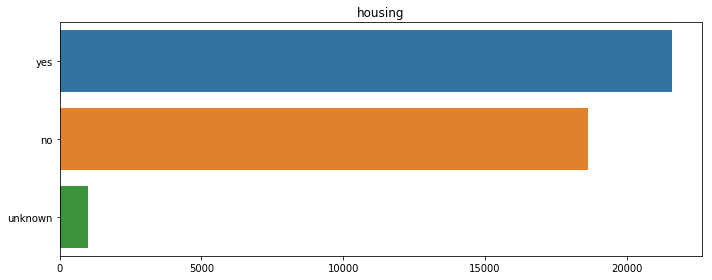

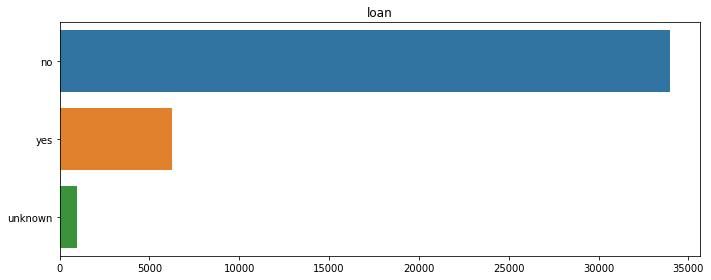

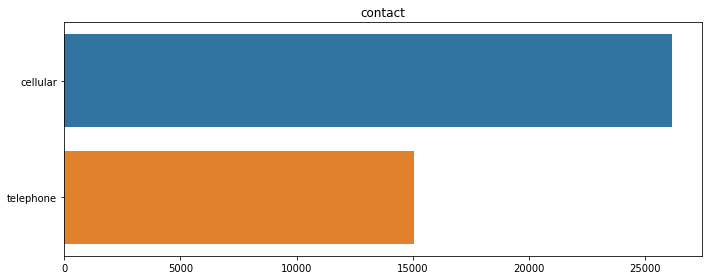

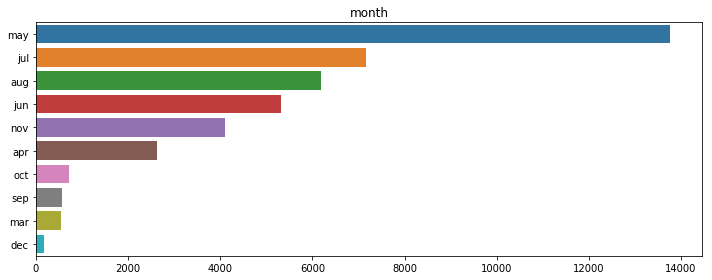

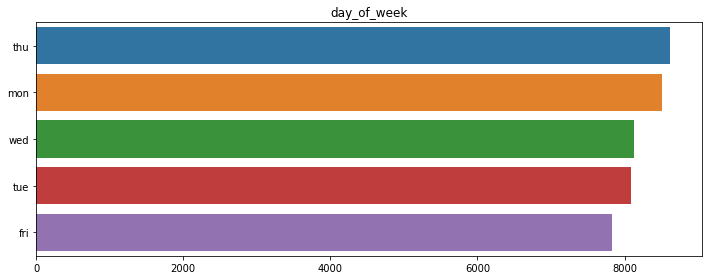

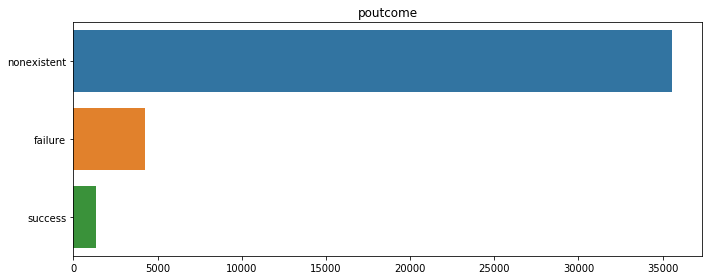

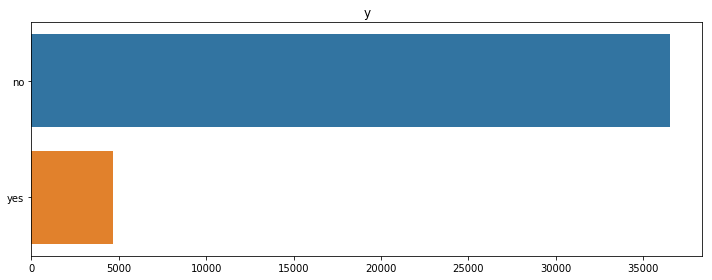

In [0]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

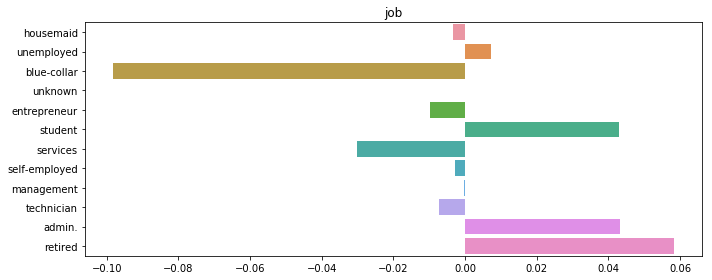

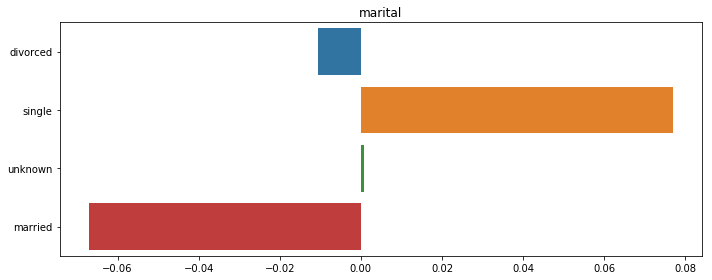

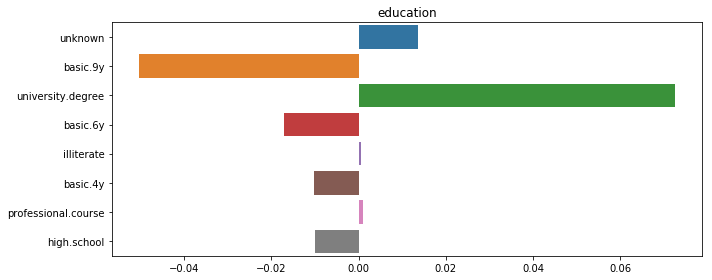

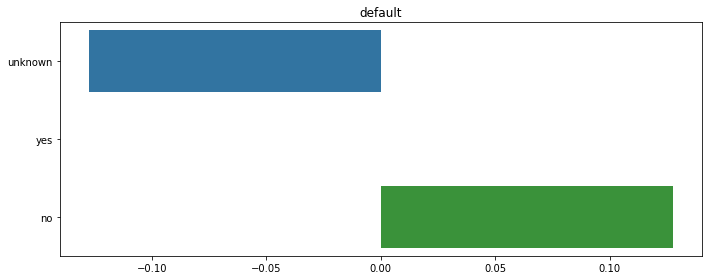

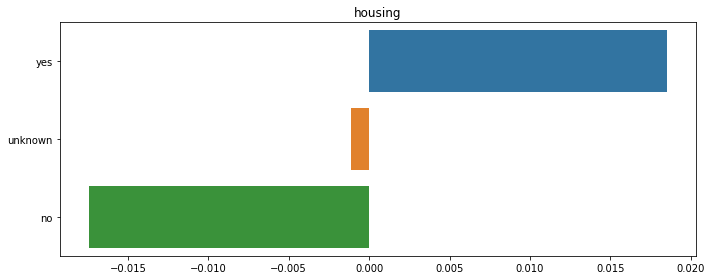

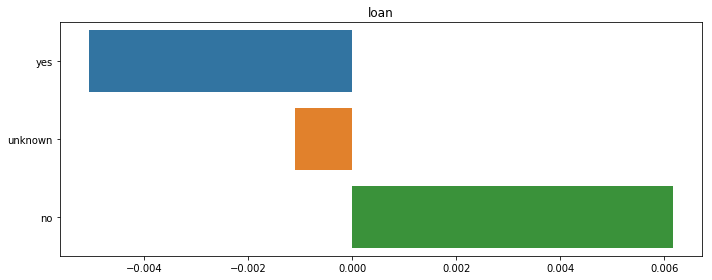

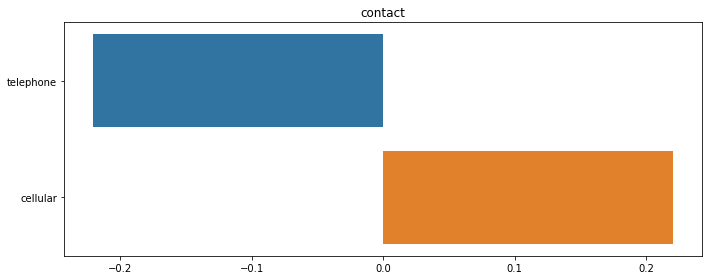

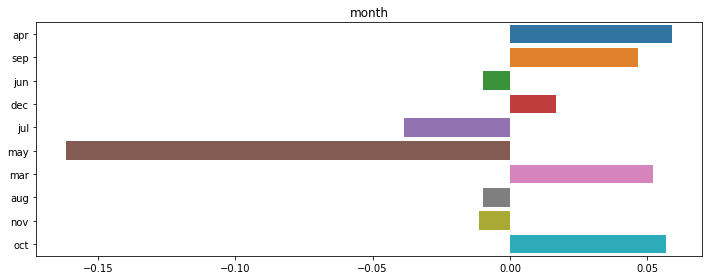

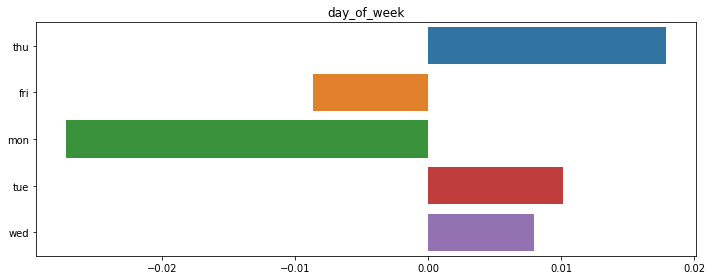

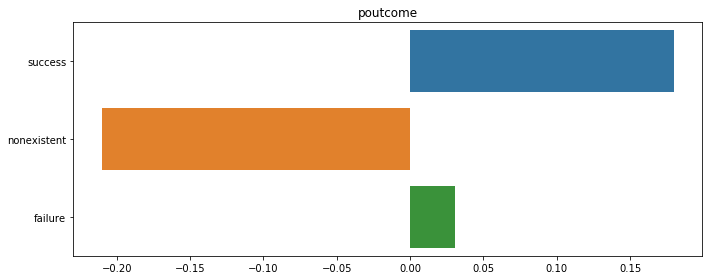

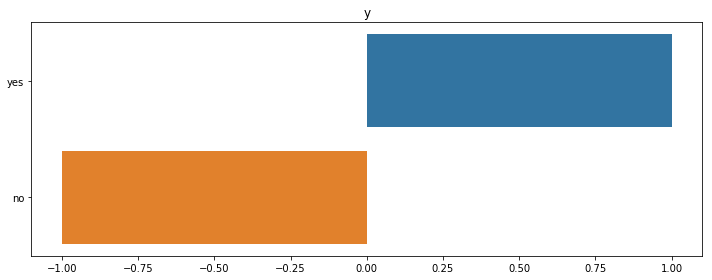

In [0]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()
    

## Missing Value /Unknown value

In [0]:
df.default.replace('unknown','no',inplace=True)

In [0]:
df['default'] = df.default.replace('unknown',df.default.mode([0]))


In [0]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)


In [0]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [0]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [0]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [0]:
df['y'].replace({'no':0,'yes':1},inplace=True)

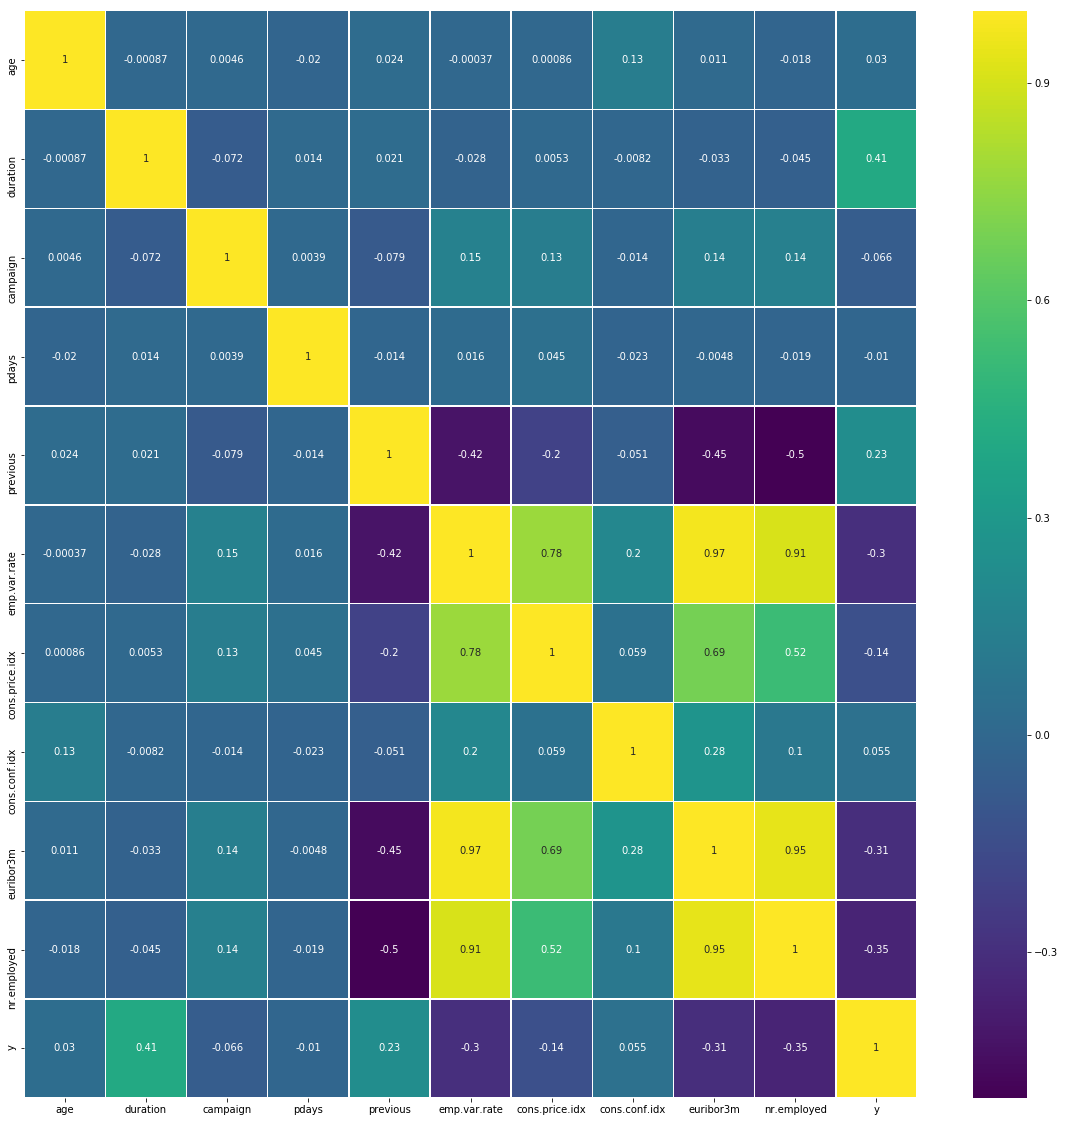

In [0]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [0]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

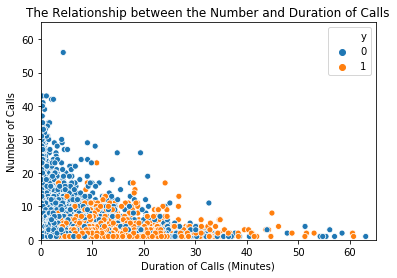

In [0]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [0]:
# drop rows where call duration was less than 10 seconds
#dropped 290 rows
#[df.duration < 10/60]
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [0]:
#putting age into bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

In [0]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

## Function to generate model report and plot auc_roc curve

In [0]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

In [0]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

## Model Train

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [0]:
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)

In [0]:
X = df.drop(['y','duration'],1)
y = df['y']

In [0]:
X_train_im, X_test_im, y_train_im, y_test_im= train_test_split(X,y, test_size=0.3, random_state=0)

## Logistic Regression

In [0]:
lg_clf=LogisticRegression()

In [0]:
#Fitting on data
lg_clf.fit(X_train_im, y_train_im)

#Scoring the model on train data
score_lg_train=lg_clf.score(X_train_im, y_train_im)
print("Training score: %.2f " % score_lg_train)

#Scoring the model on test_data
score_lg_test=lg_clf.score(X_test_im, y_test_im)
print("Testing score: %.2f " % score_lg_test)

y_pred_lg = lg_clf.predict(X_test_im)
# y_prob = rf_clf.predict_proba(X_test)
# probs = y_prob[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score: 0.90 
Testing score: 0.90 


In [0]:
generate_model_report(y_test_im,y_pred_lg)

Accuracy =  0.8993201683392684
Precision =  0.6659242761692651
Recall =  0.21464465183058148
F1 Score =  0.32464712269272533


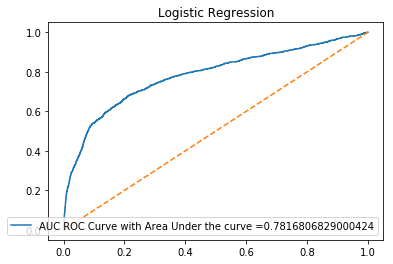

In [0]:
y_pred_proba = lg_clf.predict_proba(X_test_im)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_im,  y_pred_proba)
auc = roc_auc_score(y_test_im, y_pred_proba)
plt.title('Logistic Regression')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()


## Random Forest Classifier

In [0]:
#Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

#Fitting on data
rf_clf.fit(X_train_im, y_train_im)

#Scoring the model on train data
score_rf=rf_clf.score(X_train_im, y_train_im)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=rf_clf.score(X_test_im, y_test_im)
print("Testing score: %.2f " % score_rf)

y_pred_rf = rf_clf.predict(X_test_im)

Training score: 0.90 
Testing score: 0.90 


In [0]:
generate_model_report(y_test_im,y_pred_rf)

Accuracy =  0.9001294917449013
Precision =  0.6962962962962963
Recall =  0.2024407753050969
F1 Score =  0.3136818687430478


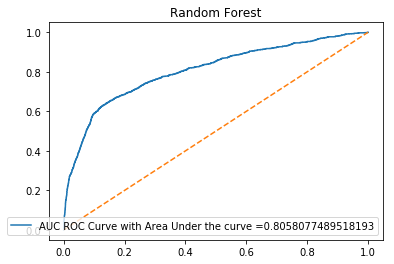

In [0]:
y_pred_proba = rf_clf.predict_proba(X_test_im)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_im,  y_pred_proba)
auc = roc_auc_score(y_test_im, y_pred_proba)
plt.title('Random Forest')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()



```
# This is formatted as code
```

## Random Forest with GridSearch

In [0]:
#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

# Code starts here
model_2 = RandomForestClassifier(n_estimators=30, random_state = 33)

p_tree = GridSearchCV(estimator=model_2,param_grid=parameter_grid,cv=5)

p_tree.fit(X_train_im,y_train_im)

acc_2 = p_tree.score(X_test_im,y_test_im)

y_pred_hyp = p_tree.predict(X_test_im)
print('Accuracy of Grid Seacrch cv = ',acc_2)
# Code ends here

Accuracy of Grid Seacrch cv =  0.8998866947232114


In [0]:
p_tree.best_params_

{'max_depth': 8, 'min_samples_leaf': 10}

In [0]:
generate_model_report(y_test_im,y_pred_hyp)

Accuracy =  0.8998866947232114
Precision =  0.6517509727626459
Recall =  0.2404881550610194
F1 Score =  0.3513371788148925


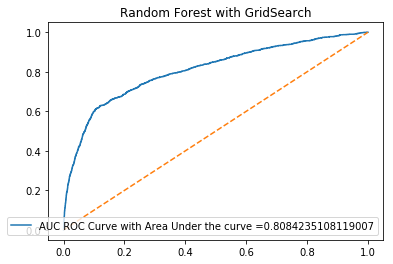

In [0]:
y_pred_proba = p_tree.predict_proba(X_test_im)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_im,  y_pred_proba)
auc = roc_auc_score(y_test_im, y_pred_proba)
plt.title('Random Forest with GridSearch')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

### Undersampling

In [0]:
minority_class_len = len(df[df.y == 1])
print(minority_class_len)

4640


In [0]:
majority_class_indices = df[df['y'] == 0].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41170, 41175, 41176, 41177, 41179, 41180, 41182, 41184, 41185,
            41187],
           dtype='int64', length=36544)


In [0]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

4640


In [0]:
minority_class_indices = df[df['y'] == 1].index
print(minority_class_indices)

Int64Index([   75,    83,    88,   129,   139,   182,   286,   388,   389,
              446,
            ...
            41165, 41166, 41171, 41172, 41173, 41174, 41178, 41181, 41183,
            41186],
           dtype='int64', length=4640)


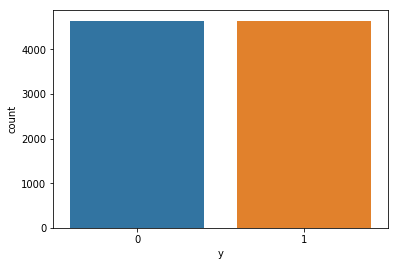

In [0]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = df.loc[under_sample_indices]
sns.countplot(x='y', data=under_sample)

In [0]:
X_bl = under_sample.drop(['y','duration','contacted_before'],1)
Y_bl = under_sample.loc[:, df.columns=='y']
X_train_bl, X_test_bl, Y_train_bl, Y_test_bl = train_test_split(X_bl, Y_bl, test_size=0.33, random_state=42)

KeyError: ignored

## RandomForestClassifier Balanced

In [0]:
rf_clf_bl = RandomForestClassifier().fit(X_train, Y_train)
Y_Test_Pred_rf = clf.predict(X_test_bl)

In [0]:
generate_model_report(Y_test_bl, Y_Test_Pred_rf)

In [0]:
generate_auc_roc_curve(rf_clf_bl, X_test_bl)


## Logistic Regression Balanced

In [0]:
lg_clf_bl = LogisticRegression().fit(X_train, Y_train)
y_test_logistic_bl = lg_clf_bl.predict(X_test_bl)


In [0]:
generate_model_report(Y_test_bl, y_test_logistic_bl)

In [0]:
generate_auc_roc_curve(lg_clf_bl, X_test_bl)

## Random Forest with GridSearch Balanced

In [0]:
#Parameter grid
parameter_grid_bl = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

# Code starts here
model_2_bl = RandomForestClassifier(n_estimators=30, random_state = 33)

p_tree_bl = GridSearchCV(estimator=model_2_bl,param_grid=parameter_grid,cv=5)

p_tree_bl.fit(X_train_bl,Y_train_bl)

acc_2 = p_tree_bl.score(X_test_bl,Y_test_bl)

y_pred_hyp_bl = p_tree_bl.predict(X_test_bl)
print('Accuracy of Grid Seacrch cv = ',acc_2)
# Code ends here

In [0]:
generate_model_report(Y_test_bl, y_pred_hyp_bl)

In [0]:
generate_auc_roc_curve(p_tree_bl, X_test_bl)

